### Цель задания

Представьте, что вы работаете дата-аналитиком в крупном инвестфонде. Вам дали данные по выручке и стоимости акций крупных компаний за 2019–2024 гг., а также предоставили динамику изменения стоимости самых популярных полезных ископаемых.
Ваша задача — провести первичный анализ имеющихся данных и построить несколько визуализаций:

- График изменения стоимости крипты с помощью Pandas.
- Двойной график изменения стоимости, в котором отражены значения динамики в абсолютных (как в датасете) и относительные (в сравнении с предыдущими значениями).
- График суммы всех параметров и каждого параметра в отдельности.
- Интерактивный график, показывающий изменение каждого параметра.
- Множественные диаграммы рассеивания для работы нескольких моделей регрессии.

In [3]:
# Импортируем библиотеки, которые будем использовать в рамках работы
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [4]:
stock_market = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/stock_market_data.csv", index_col=0)
stock_market.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [5]:
stock_market.columns.unique()

Index(['Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
       'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
       'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
       'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'],
      dtype='object')

### Задание 1
Посмотрите на тип данных столбца с датами. Преобразуйте текущий тип данных в формат pandas.Timestamp. С помощью функционала библиотеки Pandas создайте линейные графики динамики стоимости Bitcoin и Ethereum с января 2019 года по декабрь 2021 года.

In [6]:
#Преобразование даты в формат pandas.Timestamp
stock_market['Date'] = pd.to_datetime(stock_market['Date'], dayfirst=True)
stock_market['Date'].head()

0   2024-02-02
1   2024-02-01
2   2024-01-31
3   2024-01-30
4   2024-01-29
Name: Date, dtype: datetime64[ns]

In [7]:
#сортировка и индексирование
stock_market.sort_values('Date', inplace=True)
stock_market.set_index('Date', inplace=True)

In [8]:
#преобразование в числовой тип данных цены на указанные крипто-валюты
stock_market['Bitcoin_Price'] = stock_market['Bitcoin_Price'].str.replace(',', '').astype(float)
stock_market['Ethereum_Price'] = stock_market['Ethereum_Price'].str.replace(',', '').astype(float)

In [9]:
#Установка фильтра по датам
filter_data=stock_market.loc['2019-01-01':'2021-12-31']

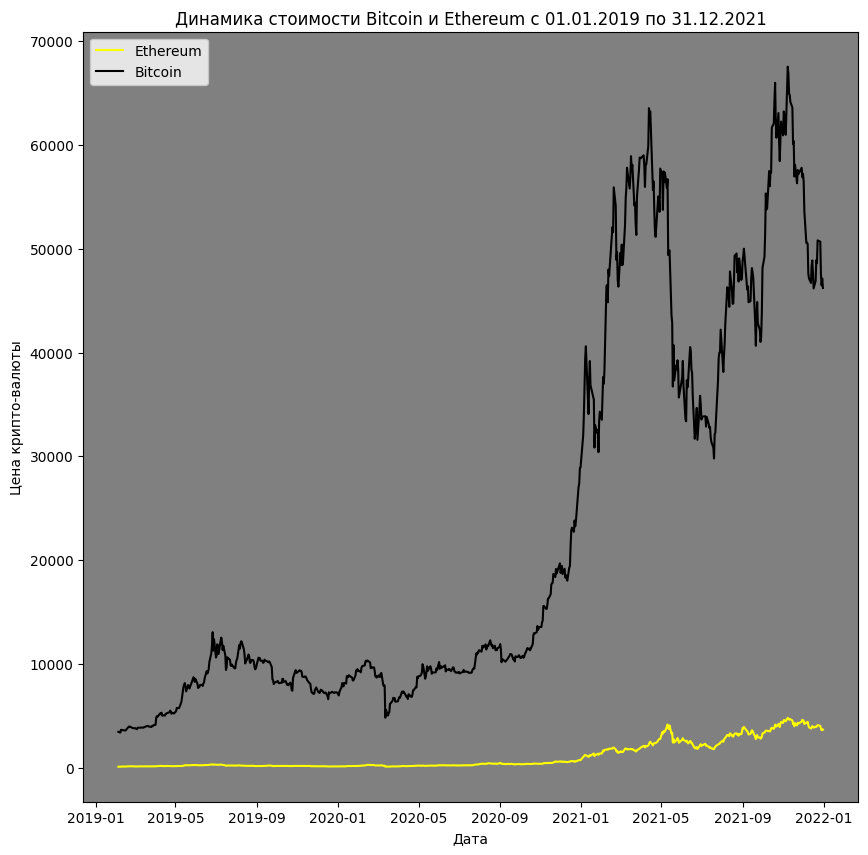

In [25]:
#построение графика
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_facecolor("gray")
plt.plot(filter_data.index, filter_data['Ethereum_Price'], label='Ethereum', color='yellow')
plt.plot(filter_data.index, filter_data['Bitcoin_Price'], label='Bitcoin', color='black')
plt.title('Динамика стоимости Bitcoin и Ethereum c 01.01.2019 по 31.12.2021')
plt.xlabel('Дата')
plt.ylabel('Цена крипто-валюты')
plt.legend()
plt.show()